In [1]:
from tqdm import tqdm
import json

from game import Game
from player import MaxPlayer, NNPlayer, RandomPlayer

In [2]:
from analyse import read_game, plot_win_over_time

In [13]:
n_player = 3
n_game = 10000
game = Game(n_player, n_game=n_game, random=True, verbose=False)
## Example de remplacement des joueurs:
game.player_list_[0] = MaxPlayer("Nathan")
game.player_list_[1] = NNPlayer("Valentin", learning_rate=.1)
game.player_list_[2] = RandomPlayer("Clément")
game_summary_list = []
winner_list_list = []
for _ in tqdm(range(n_game)):
    player_list, game_summary, winner_list = game.play()
    game_summary_list.append(game_summary)
    winner_list_list.append(list(map(str, winner_list)))
with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_example.json", "w+") as f:
    json.dump(
        {
            "player_list": list(map(str, player_list)),
            "game_summary_list": game_summary_list,
            "winner_list_list": winner_list_list,
        },
        f,
        indent=4,
    )

100%|██████████| 10000/10000 [00:28<00:00, 353.42it/s]


In [14]:
winner_list_list[:5]

[['NN Player Valentin'],
 ['MaxPlayer Nathan'],
 ['NN Player Valentin'],
 ['MaxPlayer Nathan'],
 ['MaxPlayer Nathan']]

In [15]:
player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_example.json", return_player=True)

Number of games: 10000


In [16]:
player_list_nn

['MaxPlayer Nathan', 'NN Player Valentin', 'RandomPlayer Clément']

Number of games in df_game: 10000
Number of games with a unique winner: 9590
/work/implementation/analyse.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nn_clean["game_winner"] = df_nn_clean["game_winner"].apply(lambda x: x[0])


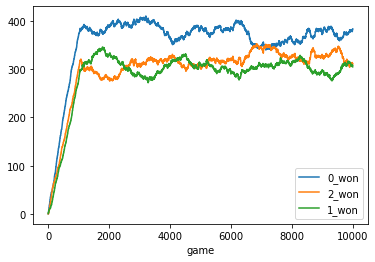

In [17]:
df_win = plot_win_over_time(df_game_nn, 1000)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3570100-157e-4a3f-b5c9-ebc0870008b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>